In [ ]:
import json
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import time
import sys
import imutils

sys.path.append('/content/drive/MyDrive/Project/')
from os import listdir

from model_archtectures import cnn_approach

#Data Preprocessing

In [ ]:
classes = {'No_DR':[0, 1, 0],'Moderate': [1, 0, 0], 'Severe': [0, 0, 1]}
dir = '/content/drive/MyDrive/Project/colored_images/'
img_size = (256, 256)
x , y = cnn_approach.get_training_data(classes, dir, img_size)

Number of examples is: 2970
X shape is: (2970, 256, 256, 3)
Y shape is: (2970, 3)


In [ ]:
x_train, y_train, x_val, y_val = cnn_approach.split_data(x,y)

In [ ]:
del x
del y

In [ ]:
y_train.shape

(2079, 3)

In [ ]:
y_val.shape

(891, 3)

In [ ]:
x_train.shape

(2079, 256, 256, 3)

# Model creation


In [ ]:
IMG_SHAPE = (256, 256, 3)
print("len ", len(classes))
#cnn_loaded_model = load_model(filepath = 'D:/Advanced AI/Project/cnn_models/imageclassifier_20231001141627.h5')
model = cnn_approach.build_model(IMG_SHAPE, len(classes))


len  3


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
logdir='logs'
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


# Training

In [ ]:
history = model.fit(x_train, y_train, batch_size=32, epochs=35, validation_data=(x_val, y_val), callbacks=[tensorboard_callback])


Epoch 1/35
65/65 [==============================] - 21s 191ms/step - loss: 13.7774 - accuracy: 0.6474 - val_loss: 1.8746 - val_accuracy: 0.8575
Epoch 2/35
65/65 [==============================] - 8s 130ms/step - loss: 1.7469 - accuracy: 0.8172 - val_loss: 1.5424 - val_accuracy: 0.8530
Epoch 3/35
65/65 [==============================] - 8s 128ms/step - loss: 1.5160 - accuracy: 0.8240 - val_loss: 1.4681 - val_accuracy: 0.8474
Epoch 4/35
65/65 [==============================] - 8s 130ms/step - loss: 1.3234 - accuracy: 0.8398 - val_loss: 1.2711 - val_accuracy: 0.8563
Epoch 5/35
65/65 [==============================] - 9s 136ms/step - loss: 1.2196 - accuracy: 0.8418 - val_loss: 1.2144 - val_accuracy: 0.8586
Epoch 6/35
65/65 [==============================] - 8s 128ms/step - loss: 1.0985 - accuracy: 0.8442 - val_loss: 1.1070 - val_accuracy: 0.8541
Epoch 7/35
65/65 [==============================] - 9s 138ms/step - loss: 1.0312 - accuracy: 0.8466 - val_loss: 0.9710 - val_accuracy: 0.8664
Epoc

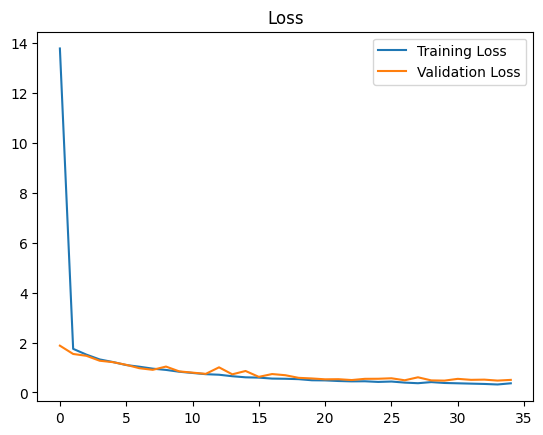

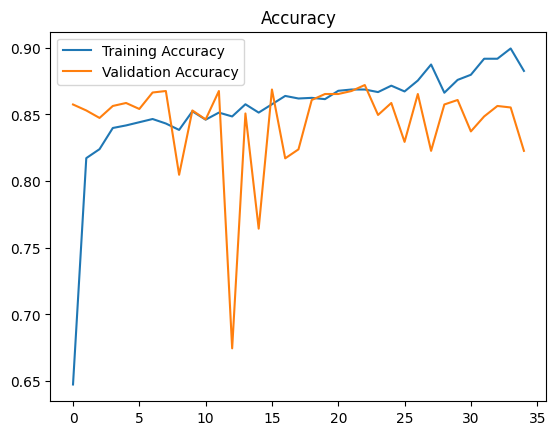

In [ ]:
cnn_approach.plot_metrics(history)


In [ ]:
import datetime

# Get the current date and time as a string
current_time = datetime.datetime.now().strftime("%Y%m%d%H%M%S")

# Construct the filename with the current time
model_name = f"/content/drive/MyDrive/Project/cnn_models/model_{current_time}.h5"

# Save the model with the filename
model.save(model_name)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Results

In [ ]:
from sklearn.metrics import accuracy_score, f1_score


In [ ]:
classes = {'No_DR':[0, 1, 0],'Moderate': [1, 0, 0], 'Severe': [0, 0, 1]}
dir = '/content/drive/MyDrive/Project/colored_images/Testing/'
img_size = (256, 256)
x_test , y_test = cnn_approach.get_training_data(classes, dir, img_size)

Number of examples is: 29
X shape is: (29, 256, 256, 3)
Y shape is: (29, 3)


In [ ]:
best_model = load_model("/content/drive/MyDrive/Project/cnn_models/model_20231024115237.h5")

In [ ]:
loss, acc = best_model.evaluate(x=x_test, y=y_test)


1/1 [==============================] - 1s 909ms/step - loss: 0.7145 - accuracy: 0.6207


In [ ]:
print (f"Test Loss = {loss}")
print (f"Test Accuracy = {acc}")

Test Loss = 0.7144872546195984
Test Accuracy = 0.6206896305084229


In [ ]:
y_test_prob = best_model.predict(x_test)

1/1 [==============================] - 0s 221ms/step


In [ ]:
from sklearn.metrics import precision_score, recall_score


def compute_f1_score(y_true, prob):
    # convert the vector of probabilities to a target vector
    y_pred = np.where(prob > 0.5, 1, 0)

    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')

    score = f1_score(y_true, y_pred, average='weighted')

    return precision, recall, score

In [ ]:
precision, recall, f1score = compute_f1_score(y_test, y_test_prob)
print(f"Precision: {precision}")
print(f"Recall   : {recall}")
print(f"F1 score : {f1score}")

Precision: 0.8366606170598911
Recall   : 0.6206896551724138
F1 score : 0.5687167238891377


0

#Predictions

In [ ]:
from tensorflow.keras.preprocessing import image


In [ ]:
img_path = '/content/drive/MyDrive/Project/colored_images/Testing/Severe/0f882877bf13.png'

In [ ]:
orig_image = cv2.imread(img_path)
resized = cv2.resize(orig_image, (256, 256))

In [ ]:

test_image = image.load_img(img_path, target_size=(256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0

In [ ]:
predictions = best_model.predict(test_image)
i = np.argmax(predictions[0])
predictions

1/1 [==============================] - 0s 212ms/step


array([[0.55070424, 0.16803387, 0.2812619 ]], dtype=float32)

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model

class LayerCAM:
    def __init__(self, model, classIdx, layerName=None):
        # store the model, the class index used to measure the class
        # activation map, and the layer to be used when visualizing
        # the class activation map
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName

        # if the layer name is None, attempt to automatically find
        # the target output layer
        if self.layerName is None:
            self.layerName = self.find_target_layer()

    def find_target_layer(self):
        # attempt to find the final convolutional layer in the network
        # by looping over the layers of the network in reverse order
        for layer in reversed(self.model.layers):
            # check to see if the layer has a 4D output
            if len(layer.output.shape) == 4:
                return layer.name

        # otherwise, we could not find a 4D layer so the GradCAM
        # algorithm cannot be applied
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")


    def compute_heatmap(self, image, eps=1e-8):
        gradModel = Model(inputs=[self.model.inputs], outputs=[self.model.get_layer(self.layerName).output, self.model.output])

        with tf.GradientTape() as tape:
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            loss = predictions[:, self.classIdx]

        grads = tape.gradient(loss, convOutputs)

        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")

        # Multiply the guided gradients with the positive values of the activations
        guidedGrads = castConvOutputs * castGrads * grads * convOutputs

        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]

        # Compute the average of the gradient values, and use them as weights
        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

        (w, h) = (image.shape[2], image.shape[1])
        heatmap = cv2.resize(cam.numpy(), (w, h))

        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")

        return heatmap

    def overlay_heatmap(self, heatmap, image, alpha=0.5,
        colormap=cv2.COLORMAP_JET):
        heatmap = cv2.applyColorMap(heatmap, colormap)
        output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)

        return (heatmap, output)


In [ ]:
# initialize our gradient class activation map and build the heatmap
cam = LayerCAM(best_model, i)

In [ ]:
heatmap = cam.compute_heatmap(test_image)

In [ ]:
# resize the resulting heatmap to the original input image dimensions
# and then overlay heatmap on top of the image
heatmap = cv2.resize(heatmap, (orig_image.shape[1], orig_image.shape[0]))


In [ ]:
(heatmap, output) = cam.overlay_heatmap(heatmap, orig_image, alpha=0.5)

In [ ]:
label = "moderate"

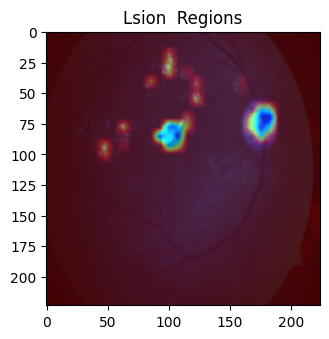

In [ ]:
# Display the original image, heatmap, and overlay
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(132)
plt.title('Lsion  Regions')
plt.imshow(output, cmap='viridis')

plt.show()

